# Bayesian Auto-Encoder with intermediate gaussian sampling

<div class="alert alert-info">
<p>In this notebook we experiment with an bayesian auto-encoder architecture that mimics the behaviour of a variational auto-encoder.</p>

<p>We obtain 10 monte carlo samples from the posterior over the weights. This way, the feedforward procedure returns 10 hidden representations (1 for each weight sample) for each datapoint.</p>

<p>We then compute the sample mean and the sample variance over the 10 hidden representations. This means that we fit a gaussian distribution to the hidden representation of the datapoint using maximum likelihood estimation.</p>

<p>We finally obtain 10 samples from this distribution and pass them on to the decoder (also with 10 sampled weights).</p>

<p>This way we restrict our hidden units to become gaussian distributed like in a variational auto-encoder. We even add the same KL-divergence term to it.</p>
</div>

In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_vae_artificial import BayesianVAEArtificial

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# One hidden layer: 32

In [5]:
n_inputs = 784
n_neurons_encoder = []
n_latent = 32
n_neurons_decoder = []
vi = BayesianVAEArtificial('BAE_32_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
   [32.5] Epoch: 01 | NELBO: 10955928.222611 | ELL: -199.164896 | KL: 1858.950786 | Val. ELL: -137.082073
   [68.2] Epoch: 02 | NELBO: 6569496.759907 | ELL: -119.439712 | KL: 312.573339 | Val. ELL: -104.329328
   [103.9] Epoch: 03 | NELBO: 5341324.152681 | ELL: -97.109419 | KL: 306.120470 | Val. ELL: -89.525759
   [142.6] Epoch: 04 | NELBO: 4682906.981352 | ELL: -85.137778 | KL: 329.189520 | Val. ELL: -80.530807
   [180.8] Epoch: 05 | NELBO: 4325394.783217 | ELL: -78.637145 | KL: 351.783997 | Val. ELL: -76.623085
   [217.8] Epoch: 06 | NELBO: 4185526.247086 | ELL: -76.093760 | KL: 369.463434 | Val. ELL: -75.089712
   [254.0] Epoch: 07 | NELBO: 4122405.668998 | ELL: -74.945873 | KL: 382.643009 | Val. ELL: -74.394391
   [290.1] Epoch: 08 | NELBO: 4089030.412005 | ELL: -74.338863 | KL: 392.933335 | Val. ELL: -73.861850
   [326.3] Epoch: 09 | NELBO: 4065862.569347 | ELL: -73.917468 | KL: 401.837553 | Val. ELL: -73.580

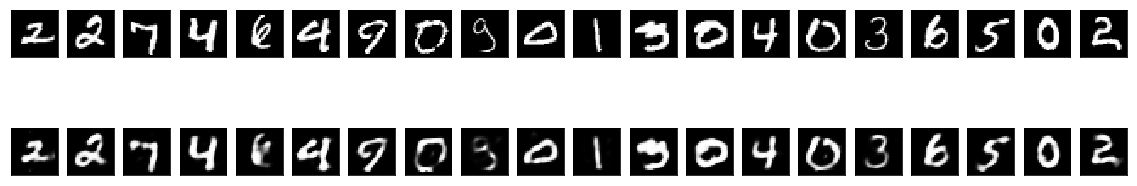

In [7]:
vi.plot_enc_dec(20, save=True)

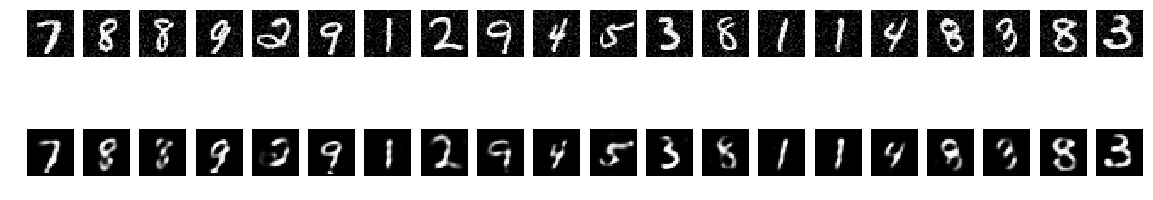

In [8]:
vi.plot_noisy_recon(20, save=True)

In [9]:
print('Test Log-Likelihood after noisy reconstruction: %.6f' % vi.benchmark(noisy=True))

Test Log-Likelihood after noisy reconstruction: -105.942082


# 256x128x2x128x256

In [10]:
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 2
n_neurons_decoder = [128, 256]
vi = BayesianVAEArtificial('BAE_256_128_2_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

   [109.7] Epoch: 01 | NELBO: 11928468.398601 | ELL: -216.604813 | KL: 15203.676206 | Val. ELL: -197.020769
   [212.4] Epoch: 02 | NELBO: 10397065.475524 | ELL: -189.032501 | KL: 277.883556 | Val. ELL: -179.941480
   [319.5] Epoch: 03 | NELBO: 9582377.708625 | ELL: -174.222888 | KL: 118.852523 | Val. ELL: -169.480660
   [427.1] Epoch: 04 | NELBO: 9087744.730769 | ELL: -165.229923 | KL: 98.961929 | Val. ELL: -160.651828
   [534.6] Epoch: 05 | NELBO: 8698534.561772 | ELL: -158.153296 | KL: 103.304192 | Val. ELL: -153.772880
   [636.7] Epoch: 06 | NELBO: 8425192.812354 | ELL: -153.183388 | KL: 106.502061 | Val. ELL: -150.476298
   [739.0] Epoch: 07 | NELBO: 8234346.024476 | ELL: -149.713357 | KL: 111.397528 | Val. ELL: -146.910965
   [841.3] Epoch: 08 | NELBO: 8089825.390443 | ELL: -147.085643 | KL: 114.992381 | Val. ELL: -144.890036
   [944.1] Epoch: 09 | NELBO: 7954329.446387 | ELL: -144.622034 | KL: 117.590309 | Val. ELL: -141.995600
   [1052.4] Epoch: 10 | NELBO: 7862018.634033 | ELL:

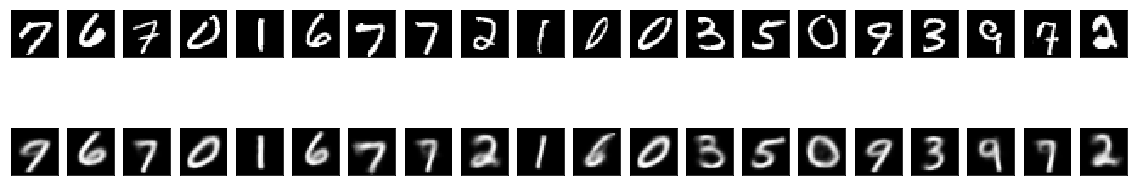

In [12]:
vi.plot_enc_dec(20, save=True)

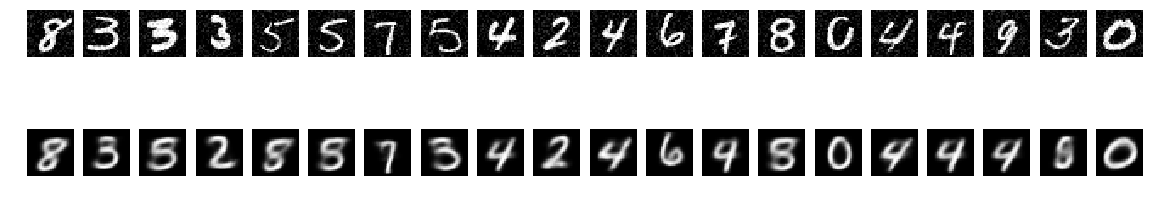

In [18]:
vi.plot_noisy_recon(20, save=True)

In [20]:
vi.benchmark(noisy=True)

-147.11214036207934

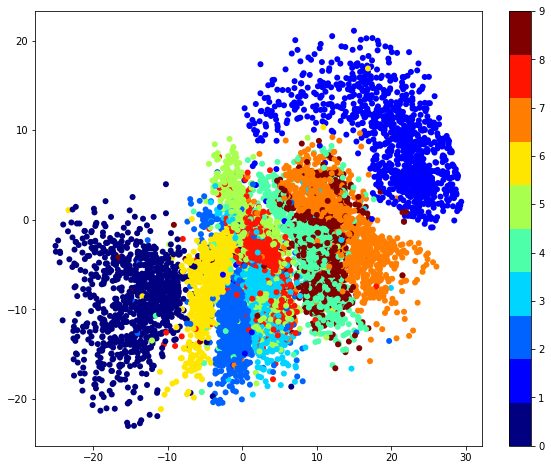

In [19]:
vi.plot_latent_repr(save=True)

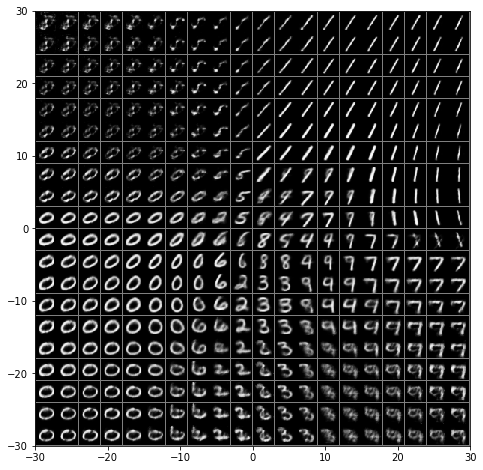

In [21]:
vi.plot_latent_recon(l_min=-30, l_max=30, save=True)

# 256x128x3x128x256

In [22]:
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 3
n_neurons_decoder = [128, 256]
vi = BayesianVAEArtificial('BAE_256_128_3_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

   [101.2] Epoch: 01 | NELBO: 11889465.510490 | ELL: -215.894750 | KL: 15254.272279 | Val. ELL: -185.705787
   [205.5] Epoch: 02 | NELBO: 9872742.254079 | ELL: -179.499000 | KL: 297.252758 | Val. ELL: -172.324718
   [310.5] Epoch: 03 | NELBO: 9115048.163170 | ELL: -165.723770 | KL: 240.796061 | Val. ELL: -159.400401
   [417.4] Epoch: 04 | NELBO: 8629288.825175 | ELL: -156.891778 | KL: 241.056558 | Val. ELL: -152.821952
   [528.0] Epoch: 05 | NELBO: 8312828.909091 | ELL: -151.138187 | KL: 228.596731 | Val. ELL: -146.361084
   [636.2] Epoch: 06 | NELBO: 8031567.344988 | ELL: -146.024570 | KL: 215.961509 | Val. ELL: -142.866843
   [741.3] Epoch: 07 | NELBO: 7761998.369464 | ELL: -141.123807 | KL: 188.977115 | Val. ELL: -136.453836
   [845.2] Epoch: 08 | NELBO: 7553655.914918 | ELL: -137.335986 | KL: 176.663293 | Val. ELL: -134.388896
   [948.3] Epoch: 09 | NELBO: 7391918.489510 | ELL: -134.395395 | KL: 171.751669 | Val. ELL: -132.067191
   [1050.9] Epoch: 10 | NELBO: 7250182.027972 | ELL:

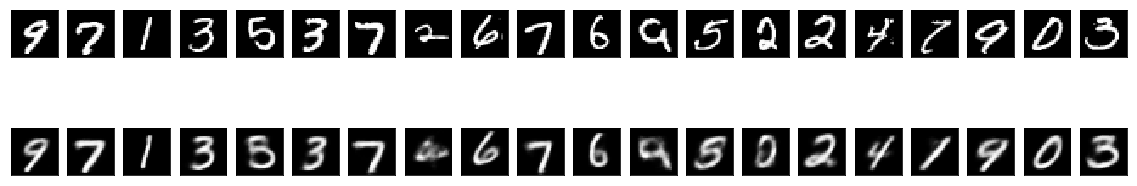

In [24]:
vi.plot_enc_dec(20, save=True)

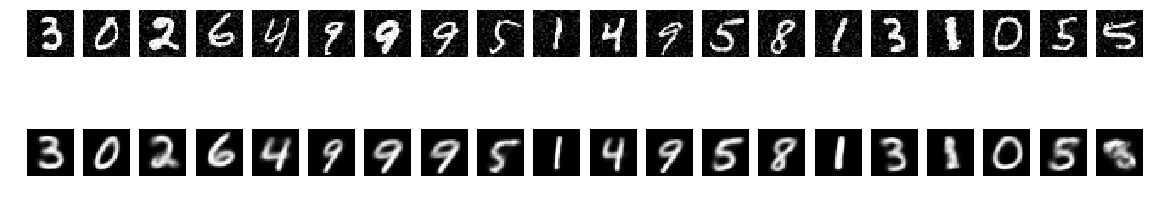

In [25]:
vi.plot_noisy_recon(20, save=True)

In [26]:
vi.benchmark(noisy=True)

-133.82513760297724

# 256x128x32x128x256

In [5]:
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 32
n_neurons_decoder = [128, 256]
vi = BayesianVAEArtificial('BAE_256_128_32_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

   [48.0] Epoch: 01 | NELBO: 11832938.675991 | ELL: -214.846224 | KL: 16396.379050 | Val. ELL: -183.887310
   [102.4] Epoch: 02 | NELBO: 8684246.438228 | ELL: -157.885560 | KL: 540.628628 | Val. ELL: -139.933222
   [148.7] Epoch: 03 | NELBO: 7353719.473193 | ELL: -133.696773 | KL: 396.977679 | Val. ELL: -126.778509
   [194.6] Epoch: 04 | NELBO: 6773918.726107 | ELL: -123.154795 | KL: 404.987045 | Val. ELL: -118.694467
   [241.6] Epoch: 05 | NELBO: 6438465.628205 | ELL: -117.055670 | KL: 403.789225 | Val. ELL: -113.665535
   [287.6] Epoch: 06 | NELBO: 6179487.618881 | ELL: -112.347265 | KL: 388.011192 | Val. ELL: -109.383298
   [333.4] Epoch: 07 | NELBO: 5947823.388112 | ELL: -108.135521 | KL: 369.702654 | Val. ELL: -105.617533
   [380.3] Epoch: 08 | NELBO: 5736355.581585 | ELL: -104.291189 | KL: 340.213309 | Val. ELL: -102.092923
   [426.6] Epoch: 09 | NELBO: 5551339.700466 | ELL: -100.927825 | KL: 309.320913 | Val. ELL: -99.741034
   [474.6] Epoch: 10 | NELBO: 5389135.919580 | ELL: -9

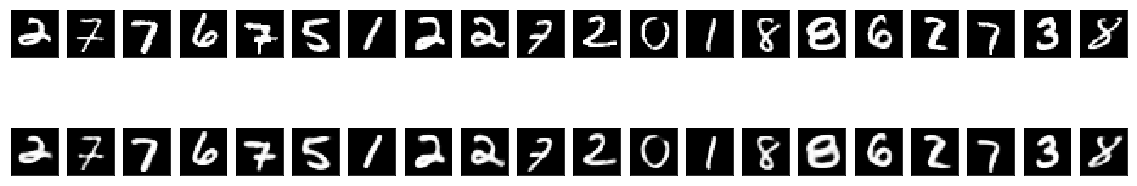

In [7]:
vi.plot_enc_dec(20, save=True)

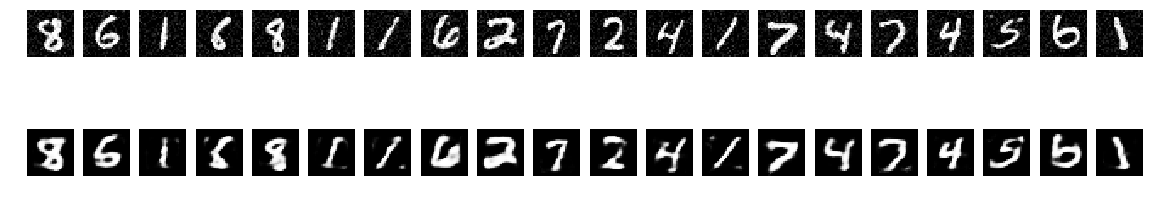

In [8]:
vi.plot_noisy_recon(20, save=True)

In [9]:
vi.benchmark(noisy=True)

-102.05504901592548

# 128x64x2x64x128

In [10]:
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 2
n_neurons_decoder = [64, 128]
vi = BayesianVAEArtificial('BAE_128_64_2_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

   [29.5] Epoch: 01 | NELBO: 12379782.011655 | ELL: -224.958674 | KL: 7054.951265 | Val. ELL: -198.193992
   [59.2] Epoch: 02 | NELBO: 10667682.745921 | ELL: -193.954616 | KL: 178.847335 | Val. ELL: -189.743797
   [90.8] Epoch: 03 | NELBO: 10227820.955711 | ELL: -185.958314 | KL: 113.672685 | Val. ELL: -182.262667
   [121.6] Epoch: 04 | NELBO: 9861170.149184 | ELL: -179.291770 | KL: 122.794572 | Val. ELL: -176.300460
   [152.4] Epoch: 05 | NELBO: 9588150.424242 | ELL: -174.327473 | KL: 139.373786 | Val. ELL: -171.247233
   [183.4] Epoch: 06 | NELBO: 9376669.027972 | ELL: -170.482305 | KL: 142.274200 | Val. ELL: -168.869676
   [214.4] Epoch: 07 | NELBO: 9216816.580420 | ELL: -167.575827 | KL: 146.109724 | Val. ELL: -164.569161
   [245.5] Epoch: 08 | NELBO: 9049785.032634 | ELL: -164.538905 | KL: 145.215674 | Val. ELL: -162.481036
   [276.7] Epoch: 09 | NELBO: 8822456.162005 | ELL: -160.405890 | KL: 132.182229 | Val. ELL: -157.102860
   [308.3] Epoch: 10 | NELBO: 8592403.113054 | ELL: -1

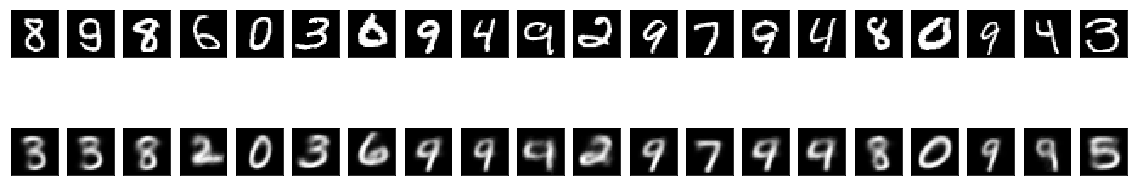

In [12]:
vi.plot_enc_dec(20, save=True)

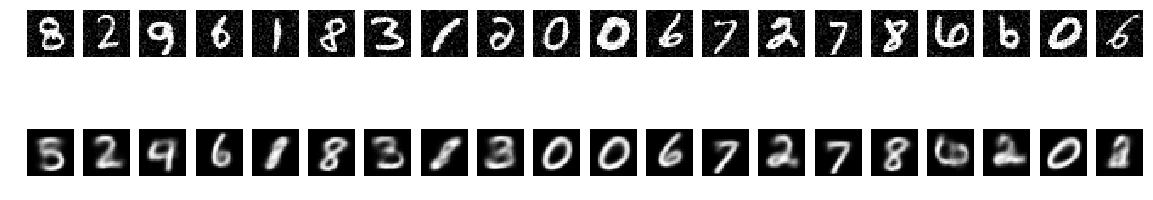

In [13]:
vi.plot_noisy_recon(20, save=True)

In [14]:
vi.benchmark(noisy=True)

-153.85211201203174

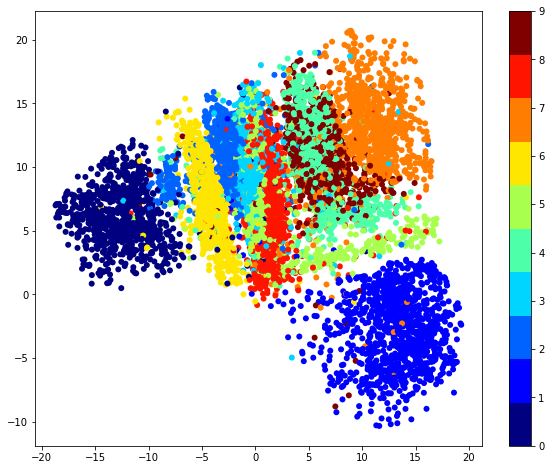

In [15]:
vi.plot_latent_repr(save=True)

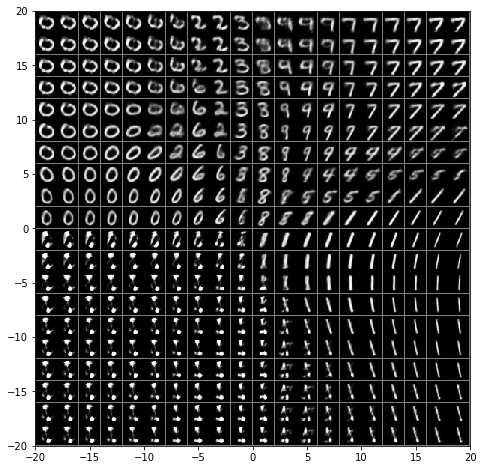

In [16]:
vi.plot_latent_recon(l_min=-20, l_max=20, save=True)

# 128x64x3x64x128

In [17]:
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 3
n_neurons_decoder = [64, 128]
vi = BayesianVAEArtificial('BAE_128_64_3_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

   [29.1] Epoch: 01 | NELBO: 12516580.724942 | ELL: -227.446321 | KL: 7033.105290 | Val. ELL: -197.855398
   [58.9] Epoch: 02 | NELBO: 10642679.913753 | ELL: -193.499886 | KL: 186.190952 | Val. ELL: -188.912231
   [90.5] Epoch: 03 | NELBO: 10186628.645688 | ELL: -185.208904 | KL: 138.916295 | Val. ELL: -180.981741
   [121.5] Epoch: 04 | NELBO: 9643027.911422 | ELL: -175.325332 | KL: 134.680715 | Val. ELL: -167.392050
   [153.2] Epoch: 05 | NELBO: 8961693.004662 | ELL: -162.937405 | KL: 135.730395 | Val. ELL: -158.716602
   [185.3] Epoch: 06 | NELBO: 8613116.984848 | ELL: -156.599389 | KL: 150.618671 | Val. ELL: -152.966256
   [217.0] Epoch: 07 | NELBO: 8385041.003497 | ELL: -152.452374 | KL: 160.427300 | Val. ELL: -149.110954
   [248.3] Epoch: 08 | NELBO: 8194707.490676 | ELL: -148.991636 | KL: 167.539004 | Val. ELL: -146.847600
   [279.9] Epoch: 09 | NELBO: 8065807.576923 | ELL: -146.647927 | KL: 171.590644 | Val. ELL: -144.619239
   [311.5] Epoch: 10 | NELBO: 7941043.282051 | ELL: -1

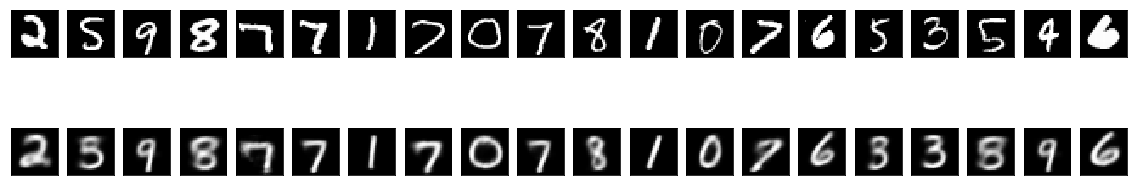

In [19]:
vi.plot_enc_dec(20, save=True)

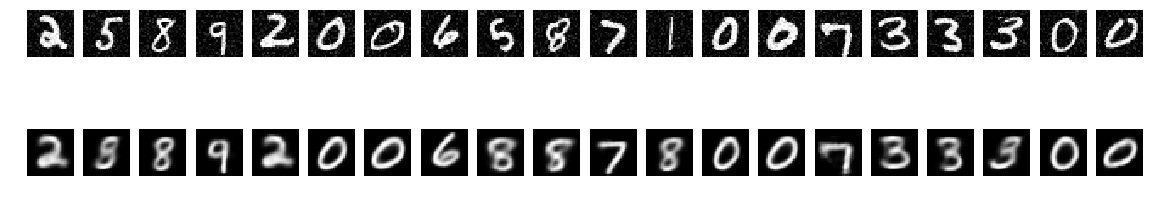

In [20]:
vi.plot_noisy_recon(20, save=True)

In [21]:
vi.benchmark(noisy=True)

-146.70357337364788

# 128x64x32x64x128

In [22]:
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 32
n_neurons_decoder = [64, 128]
vi = BayesianVAEArtificial('BAE_128_64_32_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())
vi.serialize('DUMPS/'+ vi.name + '/model.ckpt')

   [30.5] Epoch: 01 | NELBO: 12373467.603730 | ELL: -224.829512 | KL: 7844.468048 | Val. ELL: -196.418105
   [61.3] Epoch: 02 | NELBO: 10561367.137529 | ELL: -192.019476 | KL: 295.970455 | Val. ELL: -187.120782
   [92.9] Epoch: 03 | NELBO: 9398099.729604 | ELL: -170.870632 | KL: 215.022770 | Val. ELL: -159.037359
   [125.1] Epoch: 04 | NELBO: 8533071.503497 | ELL: -155.142597 | KL: 228.669105 | Val. ELL: -149.905621
   [157.1] Epoch: 05 | NELBO: 8086058.637529 | ELL: -147.014737 | KL: 248.070707 | Val. ELL: -141.155813
   [189.3] Epoch: 06 | NELBO: 7665404.537296 | ELL: -139.366783 | KL: 231.481724 | Val. ELL: -134.825556
   [221.7] Epoch: 07 | NELBO: 7367056.038462 | ELL: -133.942465 | KL: 220.485807 | Val. ELL: -130.536292
   [254.0] Epoch: 08 | NELBO: 7104105.916084 | ELL: -129.161832 | KL: 205.150140 | Val. ELL: -126.196911
   [286.3] Epoch: 09 | NELBO: 6863276.041958 | ELL: -124.783373 | KL: 190.537694 | Val. ELL: -121.297437
   [318.7] Epoch: 10 | NELBO: 6648127.869464 | ELL: -12

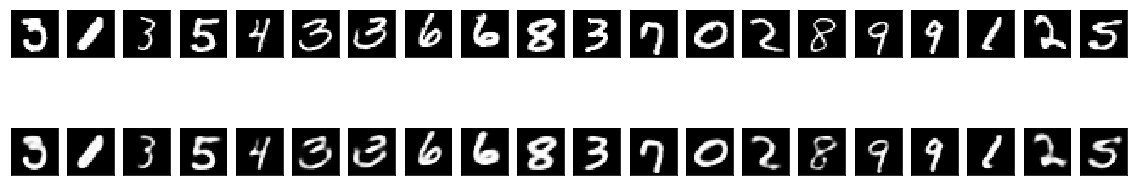

In [24]:
vi.plot_enc_dec(20, save=True)

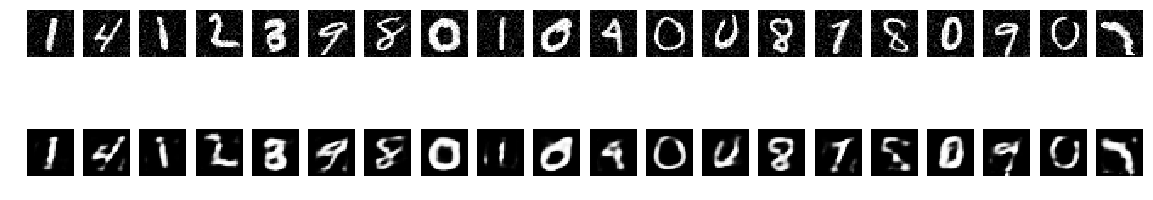

In [25]:
vi.plot_noisy_recon(20, save=True)

In [26]:
vi.benchmark(noisy=True)

-97.509795555701643